# Recap: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by **`square feet`**, but a lot of other variables play a vital role: **`bedrooms`**, **`bathrooms`**, **`location`**, **`appliances`**, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called *multicollinearity*.

In [8]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics

import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

bike_data = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-07/assets/dataset/bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

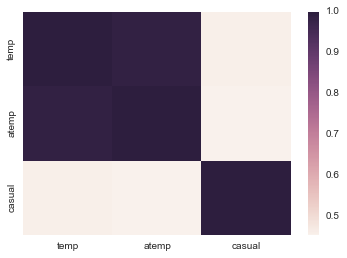

In [9]:
# Your answer

sns.heatmap(bike_data[['temp', 'atemp', 'casual']].corr())

#### Question: What did we find? 

In [10]:
# Your answer

## Intro to scikit learn

*Review the following code:*

In [11]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y):
    # Step 1:
    model = linear_model.LinearRegression()   # Specify the model
    pvals = feature_selection.f_regression(X, y)[1]  # Defining the model

    # Step 2:
    model.fit(X, y)

    residuals = (y - model.predict(X)).values

    # Step 3:
    print 'P Values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    # keep the model
    return model

In your own words, explain what the following steps are doing in the above code:

In [12]:
# Step 1:
# Your answer here
    
# Step 2:
# Your answer here
    
# Step 3:
# Your answer here

In [13]:
# Target variable (outcome)
y = bike_data['casual']

# Possible features
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

# TODO: Compute the following for 'temp', 'atemp', and both 'temp' and 'atemp'

get_linear_model_metrics(bike_data[['atemp']], y)
get_linear_model_metrics(bike_data[['temp']], y)
get_linear_model_metrics(bike_data[['temp', 'atemp']], y)


# P Values: ?
# Coefficients: ?
# y-intercept: ?
# R-Squared: ?

P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# print bike_data['temp'].skew()
# print bike_data['temp'].kurt()

# bike_data['temp'].hist(bins=20)
# sm.qqplot(bike_data['temp'], fit=True)

### Question: Has our model improved when using both temp, atemp?

In [15]:
# Your answer here

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



In [16]:
# Plot the corr matrix

In [17]:
# Compute the following:
y = bike_data['casual']
get_linear_model_metrics(bike_data[['atemp', 'hum']], y)

# P Values: ?
# Coefficients: ?
# y-intercept: ?
# R-Squared: ?

P Values: [ 0.  0.]
Coefficients: [ 125.44771399  -82.88494001]
y-intercept: 27.9791442151
R-Squared: 0.311093509696



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Guided Practice: Multicollinearity with dummy variables

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [37]:
lm = linear_model.LinearRegression()

print bike_data.weathersit.value_counts()

weather = pd.get_dummies(bike_data.weathersit)


1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64


In [38]:
# all_weather_outcomes = get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [32]:
# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666652
R-Squared: 0.0233906873841



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Similar in Statsmodels

In [33]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 22 Jun 2016   Prob (F-statistic):           1.04e-87
Time:                        20:00:43   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                 6.782e+11   1.08e+13      0.063      0.950     -2.06e+13  2.19e+13
weather[[1, 2, 3, 4]][0] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][1] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][2] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][3] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
==============================================================================
Omnibus:                     9002.161   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58970.408
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      10.554   Cond. No.                     8.15e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Students: Now drop one

In [40]:
# dropping one

lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 22 Jun 2016   Prob (F-statistic):           8.08e-89
Time:                        20:06:31   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [21]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [22]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
